<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

> **Important!  Read this first!**  Most of this lab deals with NHL data that does *not* lend itself to cluster analysis.  It is, in some ways, a *failed* cluster analysis.  For this reason, Section 9 gives you a "nice" (read: made-up) dataset just for practice.  *Both* are valuable, because sometimes your analysis won't turn out as expected!!!

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [2]:
nhl = pd.read_csv('./datasets/nhl.csv')


In [3]:
# A:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [4]:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [5]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [7]:
nhl.TOI.head()

0    2001:52:00
1    2056:14:00
2    1929:54:00
3    2020:23:00
4    2052:02:00
Name: TOI, dtype: object

In [8]:
nhl.TOI = nhl['TOI'].apply(lambda x: x.split(':')[0])

In [14]:
nhl['TOI'] = nhl['TOI'].apply(lambda x: int(x))

In [15]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI       int64
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [17]:
# A:
X = nhl.drop(['Team', 'Rank'], axis=1)
y = nhl['Rank']

In [20]:
X.head(2)

,PTS,TOI,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,121,2001,115,73,3.45,2.19,61.2,1112,1047,33.3,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,117,2056,94,72,2.74,2.10,56.6,1143,1053,33.4,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985


In [21]:
nhl['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

In [22]:
# A:
X.columns

Index(['PTS', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF', 'SA', 'SF60',
       'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF', 'CA', 'CF60',
       'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

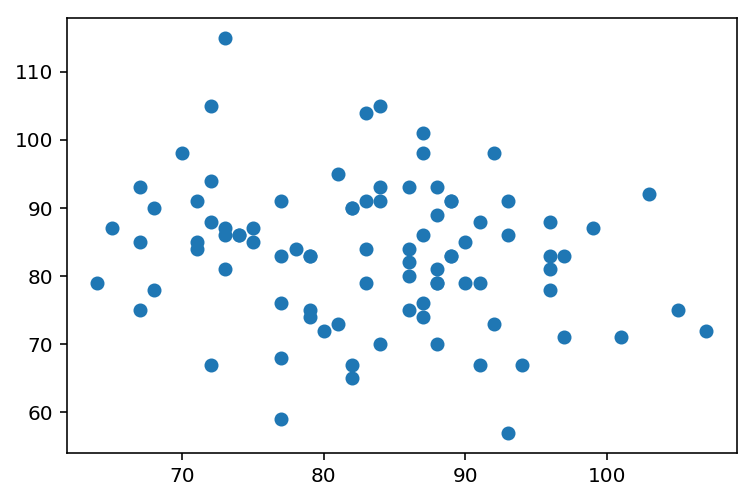

In [25]:
plt.scatter(X['GA'], X['GF'])

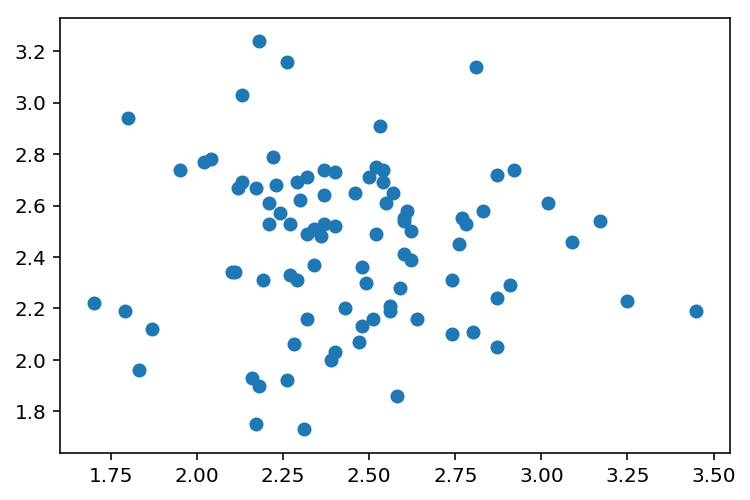

In [26]:
plt.scatter(X['GF60'], X['GA60'])

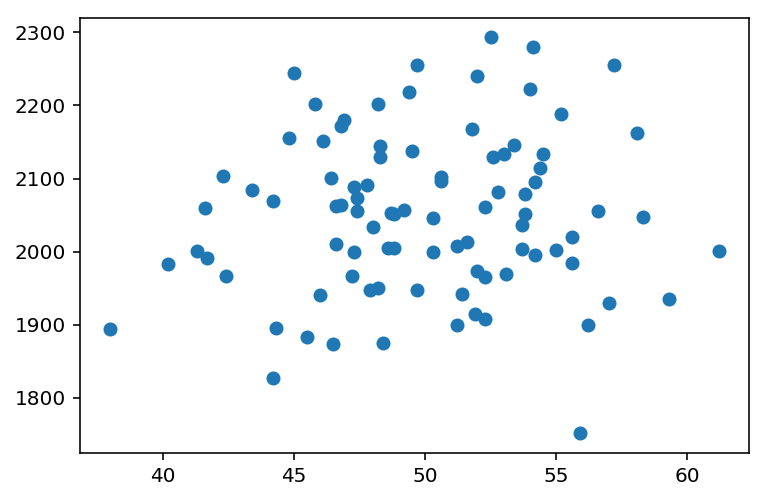

In [27]:
plt.scatter(X['GF%'], X['TOI'])

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [28]:
# A:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [30]:
Xs = pd.DataFrame(Xs, columns=X.columns)

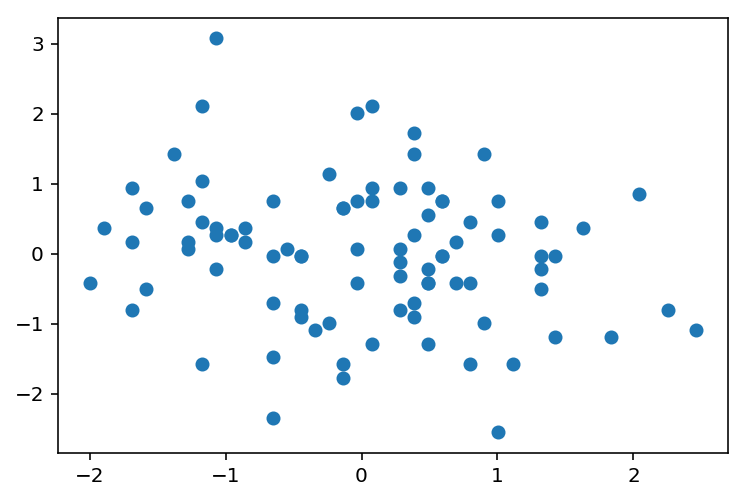

In [31]:
plt.scatter(Xs['GA'], Xs['GF'])

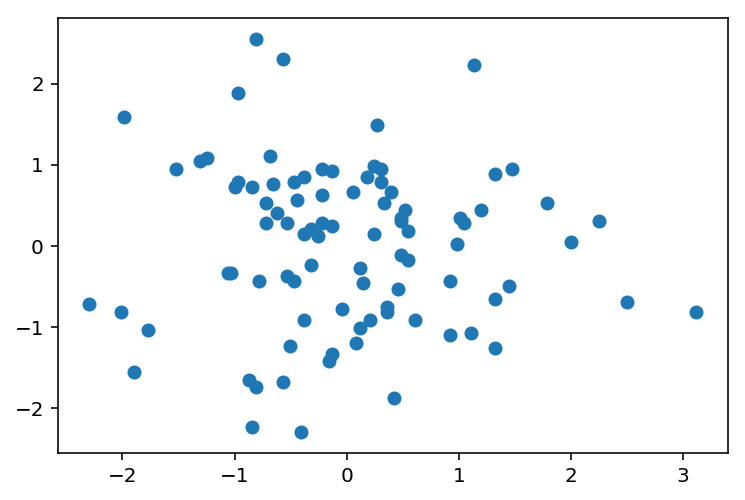

In [32]:
plt.scatter(Xs['GF60'], Xs['GA60'])

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [51]:
# A:
db = DBSCAN(eps=3, min_samples=3, n_jobs=-1)
db.fit(Xs)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=-1, p=None)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [52]:
# A:
labels = db.labels_
core_samples = db.core_sample_indices_
print(labels)

[-1  0  0 -1  0 -1 -1 -1 -1  1 -1  0 -1 -1  7 -1 -1 -1  2  2 -1  3 -1 -1 -1
 -1 -1  3  1 -1 -1 -1  1 -1 -1  3  3  1  6 -1 -1  2  2 -1 -1  3 -1 -1 -1  2
  2 -1 -1 -1  3  3 -1  3  4  3 -1 -1 -1  4 -1  3 -1 -1  5 -1 -1  4  4 -1  6
  6  7  3 -1  7 -1  3  6  6  5 -1  3  3  5 -1]


In [53]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [54]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [55]:
n_clusters

8

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [56]:
# A:
metrics.silhouette_score(X, labels)

-0.16777527627741731

**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`. (Optional! We won't cover this until Wednesday!)**

In [60]:
# A:
print('# of clusters {}'.format(n_clusters))
print('Homogeneity {}'.format(metrics.homogeneity_score(y, labels)))
print('completeness {}'.format(metrics.completeness_score(y, labels)))
print('V-measure {}'.format(metrics.v_measure_score(y, labels)))

# of clusters 8
Homogeneity 0.20543257374810533
completeness 0.13998437522526883
V-measure 0.166508045262505


### 8. Plot the clusters

You can choose any two variables for the axes.

In [61]:
# A:
import numpy as np

In [62]:
core_samples = np.zeros_like(labels, dtype=bool)
core_samples

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

In [63]:
core_samples[db.core_sample_indices_] = True
print(core_samples)

[False  True False False  True False False False False  True False False
 False False False False False False False  True False  True False False
 False False False False  True False False False False False False False
  True False False False False  True  True False False False False False
 False  True  True False False False  True  True False  True  True  True
 False False False  True False  True False False  True False False False
  True False  True False  True  True False False False False False  True
  True False False False  True False]


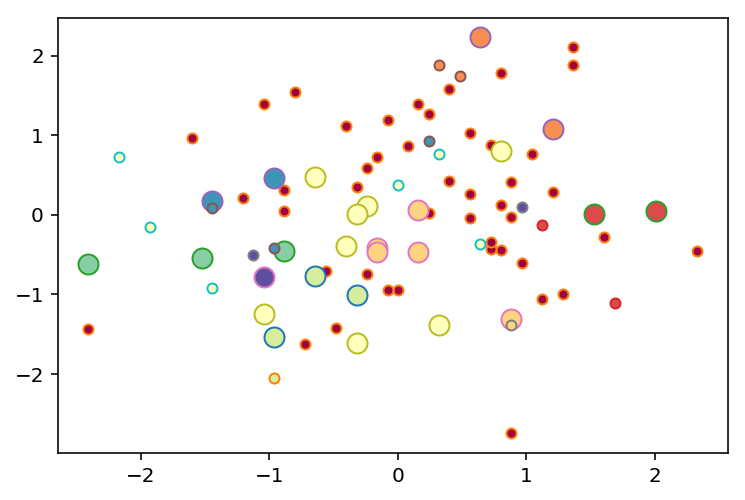

In [65]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = Xs.loc[class_member_mask & core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = Xs.loc[class_member_mask & ~core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

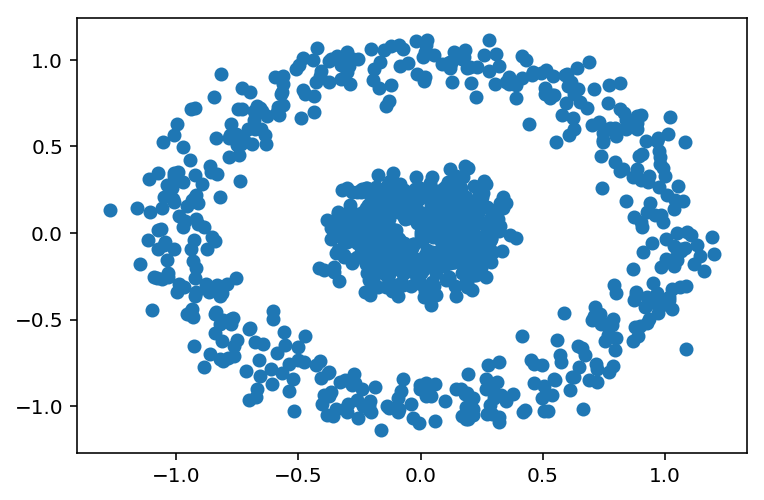

In [67]:
# A:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(circles_X[:,0], circles_X[:,1])

**9.2 Scale the data and fit DBSCAN on it.**

In [13]:
# A:

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [14]:
# A: